<a href="https://colab.research.google.com/github/shruthits02/Python_project/blob/main/Python_web_scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 requests-html

In [2]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [3]:
from matplotlib.container import Container
import requests
from bs4 import BeautifulSoup

url = "https://www.imdb.com/list/ls576754431/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

movie_containers = soup.find_all('div',attrs = {'class' : 'lister-item-content'})

movie_names = []
movie_years = []
movie_times = []
movie_ratings = []
movie_metascores = []
movie_genres = []

for container in movie_containers:

    movie_name = container.h3.a.text.strip()
    movie_names.append(movie_name)

    movie_year = container.h3.find("span", class_="lister-item-year text-muted unbold").text.strip("()").strip("I").strip(") ()")
    movie_years.append(movie_year)

    runtime_element = container.find("span", class_="runtime")
    movie_time = runtime_element.text.strip() if runtime_element else "N/A"
    movie_times.append(movie_time)

    rating_element = container.find("span", class_="ipl-rating-star__rating")
    movie_rating = rating_element.text.strip() if rating_element else "N/A"
    movie_ratings.append("N/A" if movie_rating == "0" else movie_rating)

    meta = container.find("span", class_="metascore").text.strip() if container.find("span", class_="metascore") else 'N/A'
    movie_metascores.append(meta)

    movie_genre = container.find("span", class_="genre").text.strip()
    movie_genres.append(movie_genre)

In [4]:
movie_df = pd.DataFrame({
    'Movie Name': movie_names,
    'Year of Release': movie_years,
    'Duration': movie_times,
    'Movie Rating': movie_ratings,
    'Metascore': movie_metascores,
    'Genre': movie_genres
})

In [5]:
movie_df

,Movie Name,Year of Release,Duration,Movie Rating,Metascore,Genre
0,Oppenheimer,2023,180 min,8.5,88,"Biography, Drama, History"
1,Spider-Man: Across the Spider-Verse,2023,140 min,8.7,86,"Animation, Action, Adventure"
2,Mission: Impossible - Dead Reckoning Part One,2023,163 min,7.8,81,"Action, Adventure, Thriller"
3,John Wick: Chapter 4,2023,169 min,7.7,78,"Action, Crime, Thriller"
4,Killers of the Flower Moon,2023,206 min,8.1,89,"Crime, Drama, History"
5,Dune: Part Two,2024,150 min,N/A,N/A,"Action, Adventure, Drama"
6,Past Lives,2023,105 min,8,94,"Drama, Romance"
7,Anatomy of a Fall,2023,151 min,7.9,87,"Crime, Drama, Thriller"
8,A Haunting in Venice,2023,103 min,6.7,63,"Crime, Drama, Horror"
9,Indiana Jones and the Dial of Destiny,2023,154 min,6.6,58,"Action, Adventure, Sci-Fi"


In [6]:
movie_df.to_csv('movie_df.csv', index=False)

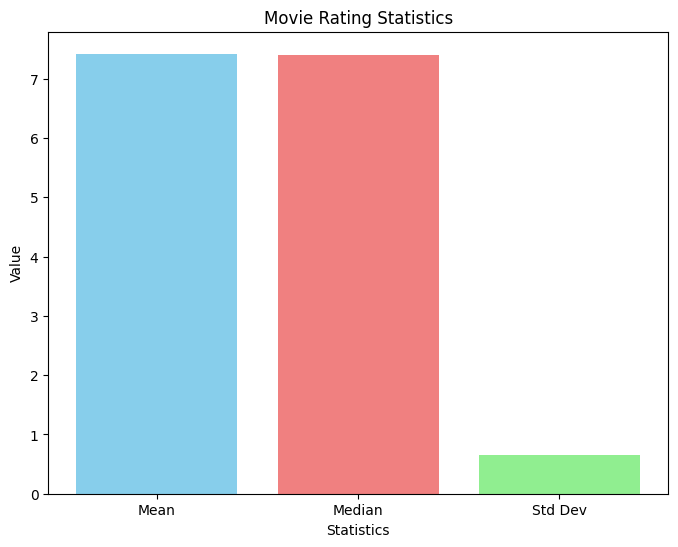

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Movie Rating': movie_df['Movie Rating'],
})

data['Movie Rating'] = pd.to_numeric(data['Movie Rating'], errors='coerce')


mean_rating = data['Movie Rating'].mean()
median_rating = data['Movie Rating'].median()
std_deviation = data['Movie Rating'].std()

# Create a bar plot
plt.figure(figsize=(8, 6))
stats_labels = ['Mean', 'Median', 'Std Dev']
stats_values = [mean_rating, median_rating, std_deviation]

plt.bar(stats_labels, stats_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Movie Rating Statistics')
plt.show()


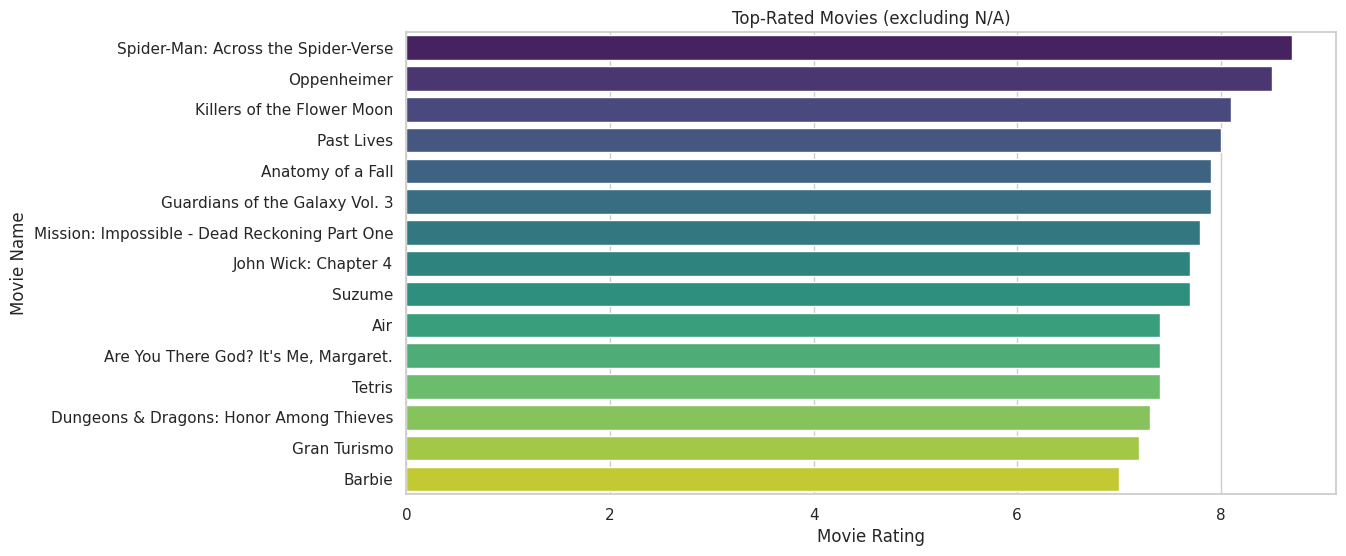

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = movie_df.copy()

filtered_df = filtered_df[filtered_df["Movie Rating"] != 'N/A']

filtered_df["Movie Rating"] = pd.to_numeric(filtered_df["Movie Rating"], errors="coerce")

sorted_df = filtered_df.sort_values(by="Movie Rating", ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_df.head(15), x="Movie Rating", y="Movie Name", palette="viridis")

# Set labels and title
plt.xlabel("Movie Rating")
plt.ylabel("Movie Name")
plt.title("Top-Rated Movies (excluding N/A)")

plt.show()

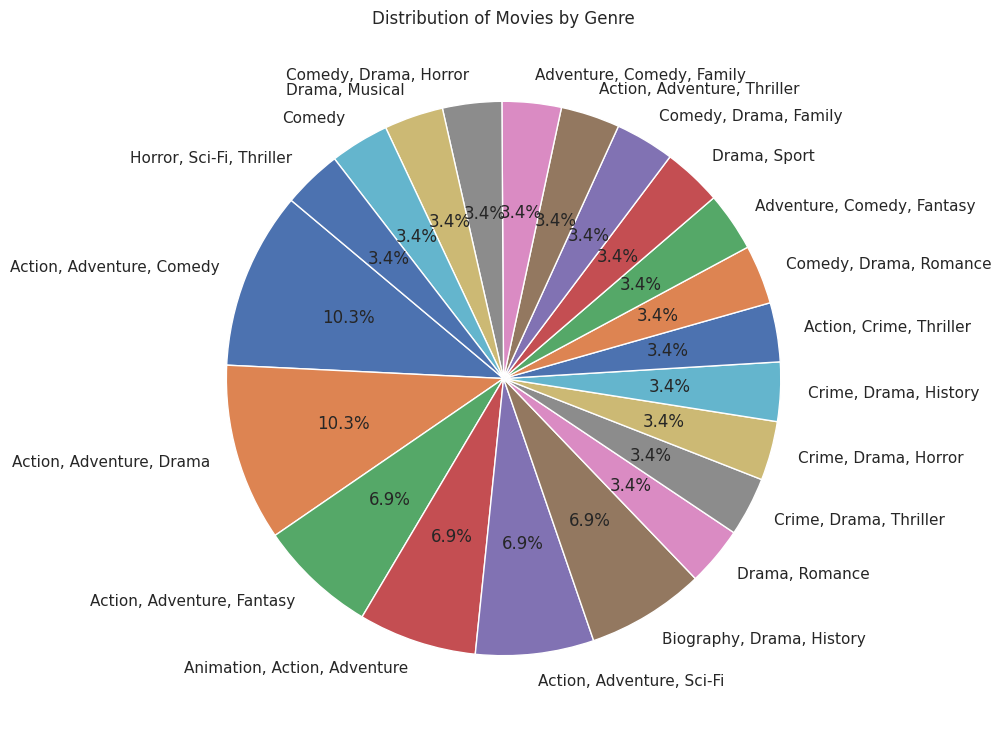

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data or your existing DataFrame
data = pd.DataFrame({
    'Movie Name': movie_df['Movie Name'],
    'Movie Rating': movie_df['Movie Rating'],
    'Genre': movie_df['Genre']
})

# Count the number of movies in each genre
genre_counts = data['Genre'].value_counts()

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies by Genre')
plt.show()


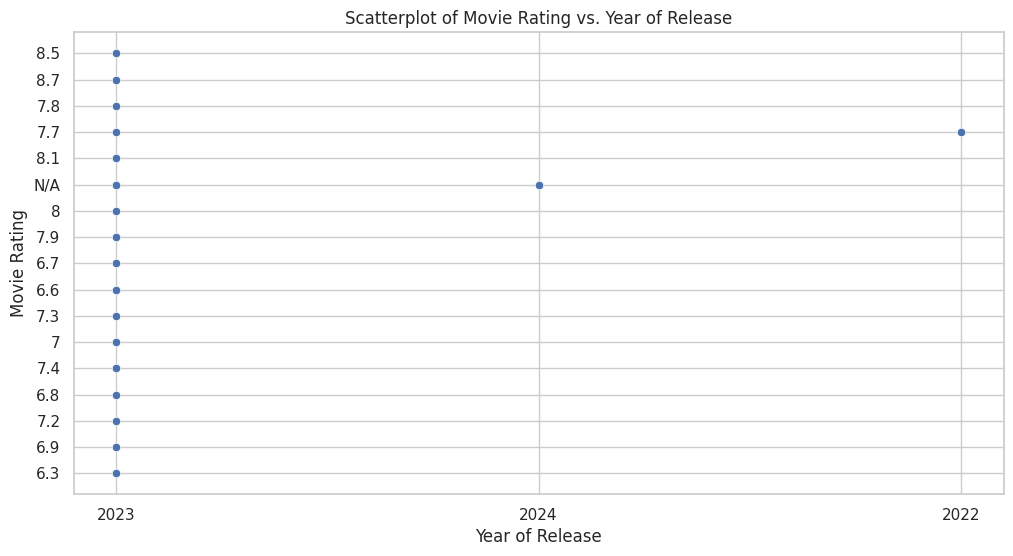

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movie_df, x='Year of Release', y='Movie Rating')

# Set labels and title
plt.xlabel("Year of Release")
plt.ylabel("Movie Rating")
plt.title("Scatterplot of Movie Rating vs. Year of Release")

plt.show()


In [10]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob


url = "https://www.imdb.com/title/tt10366206/reviews"
reviews_count = 5

threshold_polarity = 0.0

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = soup.find_all('div', class_='text show-more__control')

    if reviews:
        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()

            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity
            sentiment_subjectivity = sentiment.sentiment.subjectivity

            sentiment_category = "Positive" if sentiment_polarity > threshold_polarity else "Negative"

            print(f"Review {i + 1} - Sentiment Analysis:")
            print("Review Text:")
            print(review_text)
            print("Sentiment Analysis:")
            print(f"Polarity: {sentiment_polarity}")
            print(f"Subjectivity: {sentiment_subjectivity}")
            print(f"Review Category: {sentiment_category}")
            print("\n")
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Review 1 - Sentiment Analysis:
Review Text:
Imagine a video game where you are shooting bad guys. Your hardware is old so everything is kind of slow and out of focus. The opponents are set to Easy and you installed a hack to give you invincibility and autoaim. And they come at you slowly, shouting, out in the open, with weapons that fire three or four bullets before they run out and they can shoot anything anyway. They use no snipers, no explosives, no traps of any kind. They can't even hit you when they're next to you and wielding a knife. And you try to fight them in a decent manner, yet your avatar moves like a 60 year old man and even with the autoaim you still suck. And if you somehow get into the many separate levels where nothing make sense, you get a big cinematic that takes you out of it. And because the cinematic is in 4k or whatever, it feels like slow motion.That, my friends, is the experience of watching JW4. The style that people have applauded in the first movie has turn

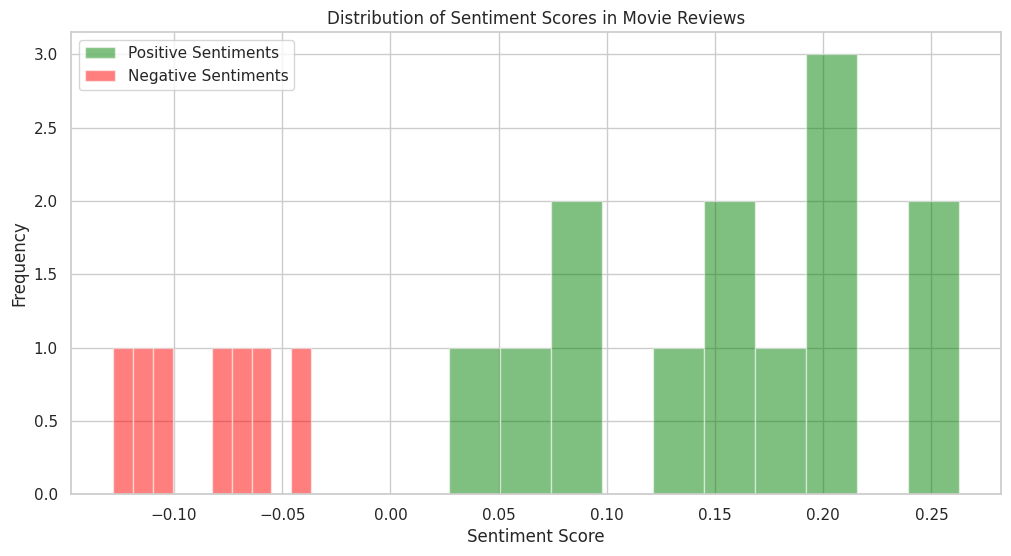

In [11]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

url = "https://www.imdb.com/title/tt10366206/reviews"
reviews_count = 20
threshold_polarity = 0.0

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews = soup.find_all('div', class_='text show-more__control')

    if reviews:

        positive_sentiments = []
        negative_sentiments = []

        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()

            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity

            if sentiment_polarity > threshold_polarity:
                positive_sentiments.append(sentiment_polarity)
            else:
                negative_sentiments.append(sentiment_polarity)

        plt.figure(figsize=(12, 6))
        plt.hist(positive_sentiments, bins=10, color='green', alpha=0.5, label='Positive Sentiments')
        plt.hist(negative_sentiments, bins=10, color='red', alpha=0.5, label='Negative Sentiments')

        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.title('Distribution of Sentiment Scores in Movie Reviews')
        plt.legend()

        plt.show()
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [12]:
import requests
from bs4 import BeautifulSoup
import os

url = "https://www.imdb.com/list/ls576754431/"

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.text, "html.parser")

    img_elements = soup.find_all("img", class_="loadlate")

    save_directory = "imdb_images"
    os.makedirs(save_directory, exist_ok=True)

    for img in img_elements:
        img_url = img["loadlate"]
        img_name = img["alt"]
        img_data = requests.get(img_url).content

        with open(os.path.join(save_directory, f"{img_name}.jpg"), "wb") as img_file:
            img_file.write(img_data)

    print(f"{len(img_elements)} images have been saved to {save_directory}.")

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

34 images have been saved to imdb_images.
